In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [4]:
df = kagglehub.dataset_download("ahmedabbas757/coffee-sales")

print("Path to dataset files:", df)

100%|██████████| 8.23M/8.23M [00:00<00:00, 97.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ahmedabbas757/coffee-sales/versions/1


In [6]:
downloaded_files = os.listdir(df)

excel_file = [f for f in downloaded_files if f.endswith('.xlsx')][0]
excel_file_path = os.path.join(df, excel_file)

df = pd.read_excel(excel_file_path)

In [7]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# Exploratory Data Analysis

In [53]:
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

In [54]:
# see number of rows and columns
df.shape

(149116, 14)

In [55]:
# see data duplicate
df.isna().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [56]:
# see quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  month             149116 non-null  int32         
 12  year              149116 non-null  int32         
 13  total_sales       149116 non-null  float64       
dtypes: d

In [57]:
# see unique values in each column

# 1- create new data frame with number of unique value in each column
columnValue = df.nunique().reset_index()

# 2- rename column name
columnValue.rename(columns = {"index" : "Column _name", 0 : "Uniue values"}, inplace = True)

# 3- see columns and number of unique values of each
columnValue

,Column _name,Uniue values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [58]:
# See quick info of numeric data
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price,month,year,total_sales
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.0,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219,3.988881,2023.0,4.686367
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000,1.000000,2023.0,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000,3.000000,2023.0,3.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000,4.000000,2023.0,3.750000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000,5.000000,2023.0,6.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000,6.000000,2023.0,360.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723,1.673091,0.0,4.227099


In [59]:
# drop some columns such as "product_id", "transaction_id" and "store_id"
df.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

In [60]:
# add new column year
df["year"] = df["transaction_date"].dt.year

# add new column month
df["month"] = df["transaction_date"].dt.month_name()

# add new column day
df["day"] = df["transaction_date"].dt.day_name()

In [61]:
df.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,month,year,total_sales,day
0,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,January,2023,6.0,Sunday
1,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,2023,6.2,Sunday
2,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,January,2023,9.0,Sunday
3,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,January,2023,2.0,Sunday
4,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,2023,6.2,Sunday


In [62]:
transactions_per_month = df['month'].value_counts()
iplot(px.bar(x=transactions_per_month.index, y=transactions_per_month.values,
             labels={'x': 'Month', 'y': 'Number of Transactions'},
             title='Transactions per Month', text_auto= True))

In [63]:
transactions_per_day = df['day'].value_counts()
iplot(px.bar(x=transactions_per_day.index, y=transactions_per_day.values,
             labels={'x': 'Month', 'y': 'Number of Transactions'},
             title='Transactions per Day', text_auto= True))

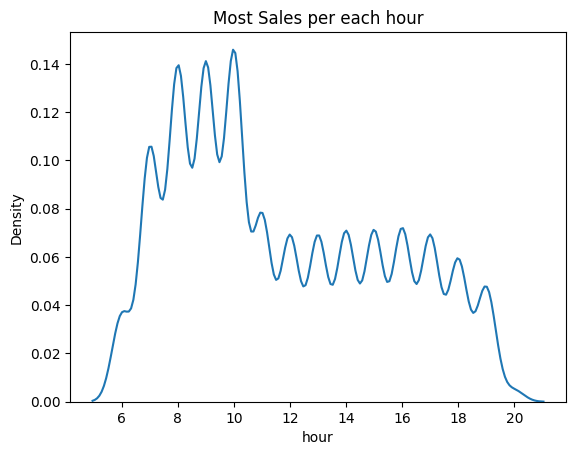

In [64]:
df["hour"] = df["transaction_time"].apply(lambda x : x.hour)
# see distribution

sns.kdeplot(df["hour"])
plt.title('Most Sales per each hour')
plt.show()

In [65]:
no_sales_quantity = df['transaction_qty'].value_counts()
iplot(px.bar(x=no_sales_quantity.index, y=no_sales_quantity.values,
             labels={'x': 'Quantity', 'y': 'Number of sales'},
             title='Number of sales quantity', text_auto= True))

In [66]:
sales_per_store = df['store_location'].value_counts()
iplot(px.pie(names=sales_per_store.index, values=sales_per_store.values,
             title='Number of sales for each store'))

In [67]:
category_count = df['product_category'].value_counts()
iplot(px.bar(x=category_count.index, y=category_count.values,
             labels={'x': 'Product Category', 'y': 'Count'},
             title='Category Count', text_auto= True))

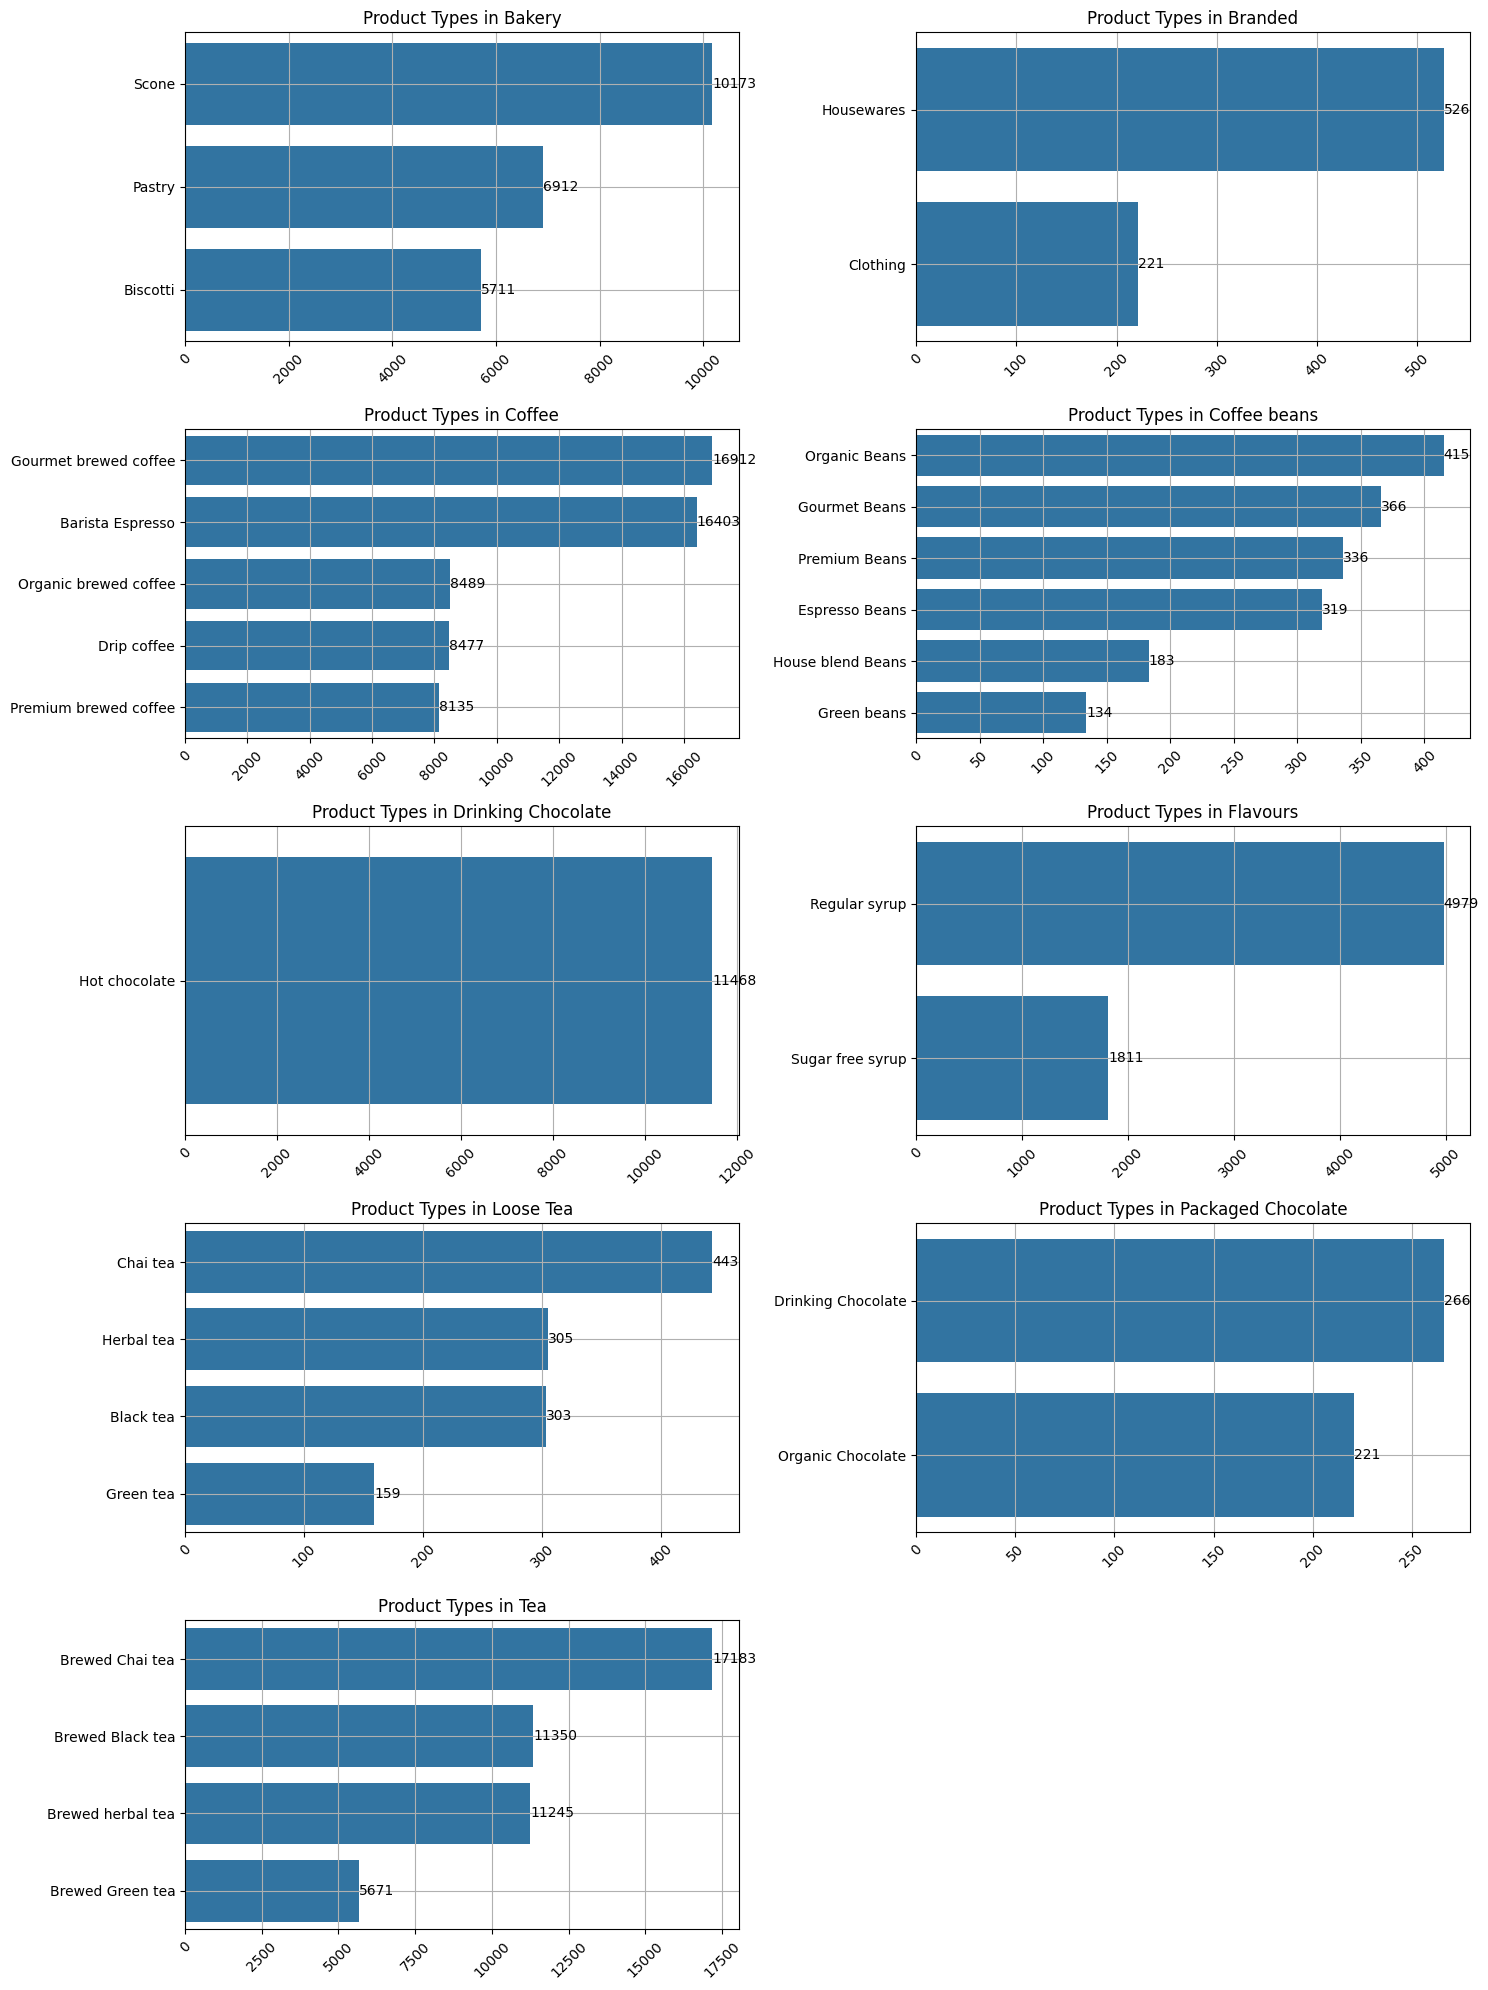

In [69]:
# Assuming 'counts' is the DataFrame obtained from your groupby operation
counts = df.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

# Get unique categories
categories = counts['product_category'].unique()

# Create subplots for each category in a 4x2 grid
fig, axes = plt.subplots(5, 2, figsize = (15, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_category'] == category]

    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending = False)

    # Create a bar plot for each category with sorted order
    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)

    # Adding bar labels
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

# Hide extra subplots if there are fewer categories than subplots
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

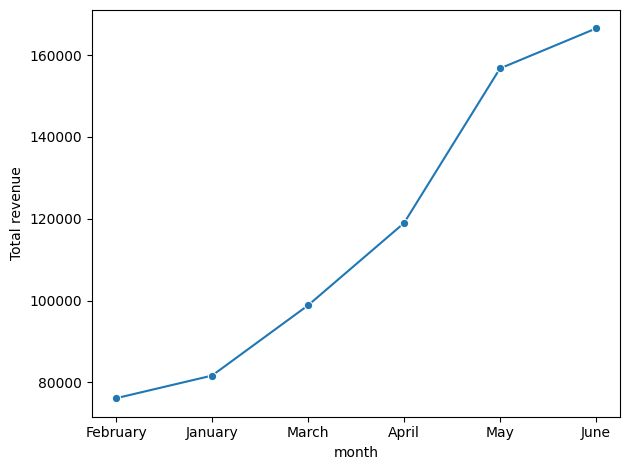

In [70]:
# Month VS revenue
df["Total revenue"] = df["transaction_qty"] * df["unit_price"]

# Grouping by month and summing the revenue
monthly_revenue  = df.groupby("month")["Total revenue"].sum().reset_index().sort_values(by = "Total revenue")

# create line plot
sns.lineplot(x = "month", y = "Total revenue", data = monthly_revenue , marker = "o")

plt.tight_layout()
plt.show()

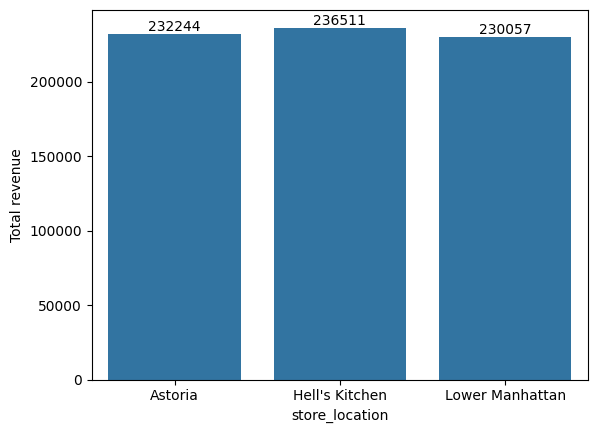

In [72]:
# Calculate total revenue for each store_location
revenue = df.groupby("store_location")["Total revenue"].sum().reset_index()

# create bar plot
ax = sns.barplot(x = "store_location", y = "Total revenue", data = revenue)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()

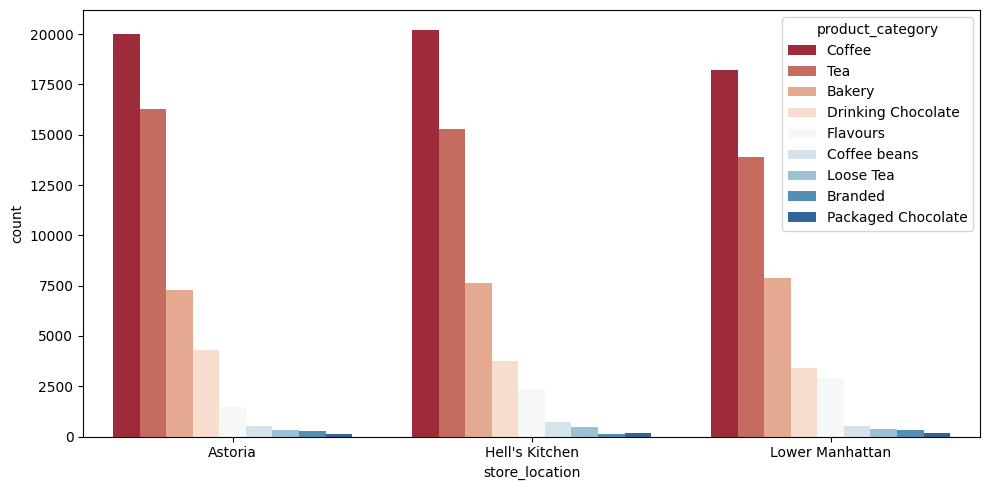

In [74]:
# Stores VS product categories

# Calculate number of product categories at each store location
popular_products = df.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()

In [75]:
product_sales = df.groupby(['product_category', 'product_type'])['transaction_qty'].sum().reset_index()

fig = px.bar(product_sales, x='product_type', y='transaction_qty', color='product_category',
             labels={'transaction_qty': 'Total Quantity Sold', 'product_type': 'Product Type'},
             title='Total Quantity Sold for Each Product')

fig.show()

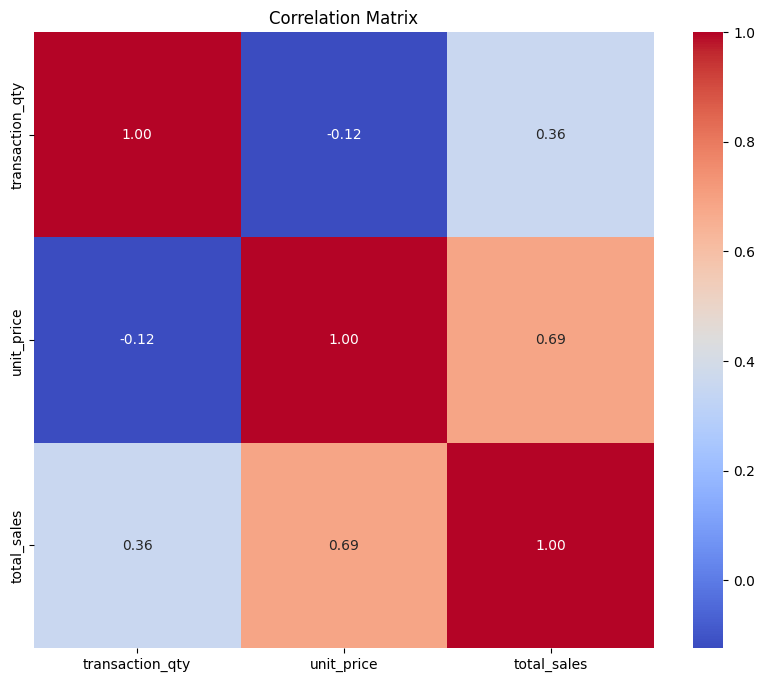

In [77]:
# Create time_of_day feature
def get_time_of_day(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['transaction_time'].apply(get_time_of_day)

features = ['transaction_qty', 'unit_price',
            'product_category', 'month', 'day', 'time_of_day']

plt.figure(figsize=(10, 8))
sns.heatmap(df[features + ['total_sales']].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

## Feature Engineering

### Konversi tipe data dan buat kolom baru

In [8]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['month'] = df['transaction_date'].dt.month
df['year'] = df['transaction_date'].dt.year
df['total_sales'] = df['transaction_qty'] * df['unit_price']

### Agregasi data per toko per bulan

Kita butuh 'store_location' jadi kita group berdasarkan 'store_id' dan 'store_location'

In [9]:
df_agg = df.groupby(['store_id', 'store_location', 'year', 'month']).agg(
    total_sales_amount=('total_sales', 'sum'),
    total_transactions=('transaction_id', 'count'),
    total_products_sold=('transaction_qty', 'sum'),
    unique_product_count=('product_id', 'nunique'),
    active_days=('transaction_date', lambda date: date.nunique())
).reset_index()

### Buat fitur turunan

In [10]:
df_agg['avg_transaction_value'] = df_agg['total_sales_amount'] / df_agg['total_transactions']
df_agg['avg_qty_per_transaction'] = df_agg['total_products_sold'] / df_agg['total_transactions']

Mengurutkan data untuk membuat target di bulan berikutnya

In [11]:
df_agg.sort_values(['store_id', 'year', 'month'], inplace=True)

## Target Variable Creation

### Buat target: performa penjualan di bulan BERIKUTNYA

In [12]:
df_agg['next_month_sales'] = df_agg.groupby('store_id')['total_sales_amount'].shift(-1)

### Hapus baris yang tidak punya data bulan berikutnya (baris terakhir untuk setiap toko)

In [13]:
df_agg.dropna(subset=['next_month_sales'], inplace=True)

### Buat label kategori performa berdasarkan quantiles

In [14]:
quantiles = df_agg['next_month_sales'].quantile([0.25, 0.75]).to_dict()
low_threshold = quantiles[0.25]
high_threshold = quantiles[0.75]

def assign_performance_label(sales):
    if sales >= high_threshold:
        return 'High'
    elif sales > low_threshold:
        return 'Medium'
    else:
        return 'Low'

df_agg['performance_category'] = df_agg['next_month_sales'].apply(assign_performance_label)

print("\nDistribusi kelas target:")
print(df_agg['performance_category'].value_counts())


Distribusi kelas target:
performance_category
Medium    7
Low       4
High      4
Name: count, dtype: int64


## Final Preprocessing

### Pilih fitur dan target

In [15]:
features = [
    'total_sales_amount', 'total_transactions', 'avg_transaction_value',
    'avg_qty_per_transaction', 'total_products_sold', 'unique_product_count',
    'active_days', 'store_location'
]
target = 'performance_category'

X = df_agg[features]
y = df_agg[target]

### Encode fitur kategori (store_location)

In [16]:
X = pd.get_dummies(X, columns=['store_location'], drop_first=True)

### Encode label target

In [17]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\nLabel Target di-encode menjadi: {list(le.classes_)} -> {list(range(len(le.classes_)))}")


Label Target di-encode menjadi: ['High', 'Low', 'Medium'] -> [0, 1, 2]


### Simpan nama fitur setelah encoding untuk digunakan nanti

In [18]:
feature_names = X.columns.tolist()

### Split data menjadi training dan testing set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

### Normalisasi/Standarisasi fitur numerik

scaler HANYA di-fit pada data training untuk mencegah data leakage

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Balancing data dengan SMOTE (HANYA pada data training)

Ini penting untuk mengatasi kelas yang tidak seimbang

In [22]:
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("\nUkuran data setelah preprocessing:")
print(f"Training set: {X_train_resampled.shape}")
print(f"Test set: {X_test_scaled.shape}")


Ukuran data setelah preprocessing:
Training set: (18, 9)
Test set: (3, 9)


# Create ML Models

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

## Inisialisasi model

In [24]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

## Latih setiap model

In [25]:
for name, model in models.items():
    print(f"Melatih {name}...")
    model.fit(X_train_resampled, y_train_resampled)

Melatih Logistic Regression...
Melatih Random Forest...
Melatih LightGBM...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 18, number of used features: 0
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGB

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# ML Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Evaluasi Model Machine Learning


===== Evaluasi untuk: Logistic Regression =====
Akurasi: 0.6667

Laporan Klasifikasi:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       0.00      0.00      0.00         1
      Medium       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


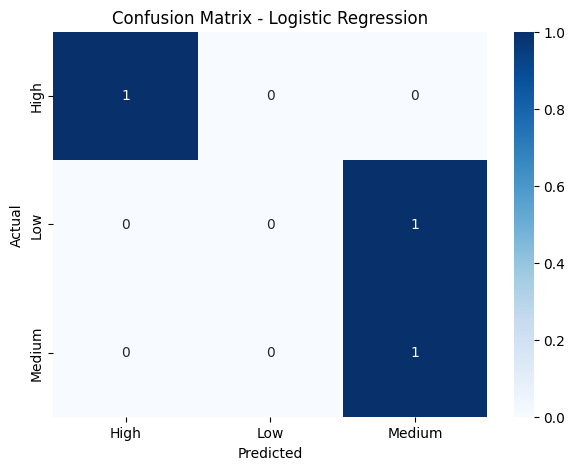


===== Evaluasi untuk: Random Forest =====
Akurasi: 1.0000

Laporan Klasifikasi:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       1.00      1.00      1.00         1
      Medium       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



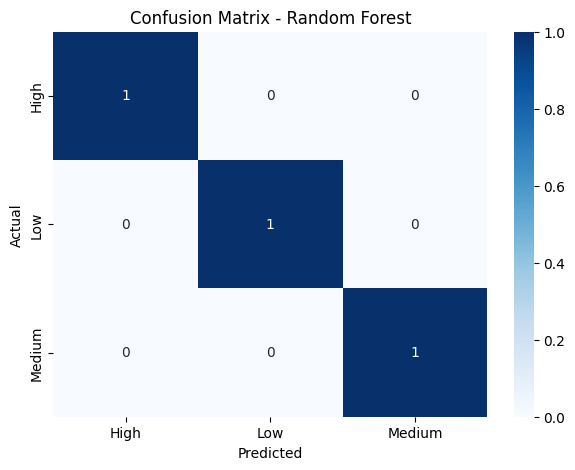


===== Evaluasi untuk: LightGBM =====
Akurasi: 0.3333

Laporan Klasifikasi:
              precision    recall  f1-score   support

        High       0.33      1.00      0.50         1
         Low       0.00      0.00      0.00         1
      Medium       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

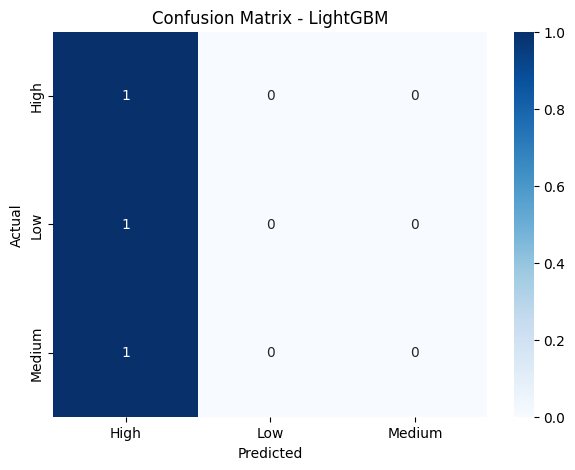

In [39]:
for name, model in models.items():
    print(f"\n===== Evaluasi untuk: {name} =====")
    y_pred = model.predict(X_test_scaled)

    # Tampilkan metrics
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Tampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Feature Importance dari Random Forest

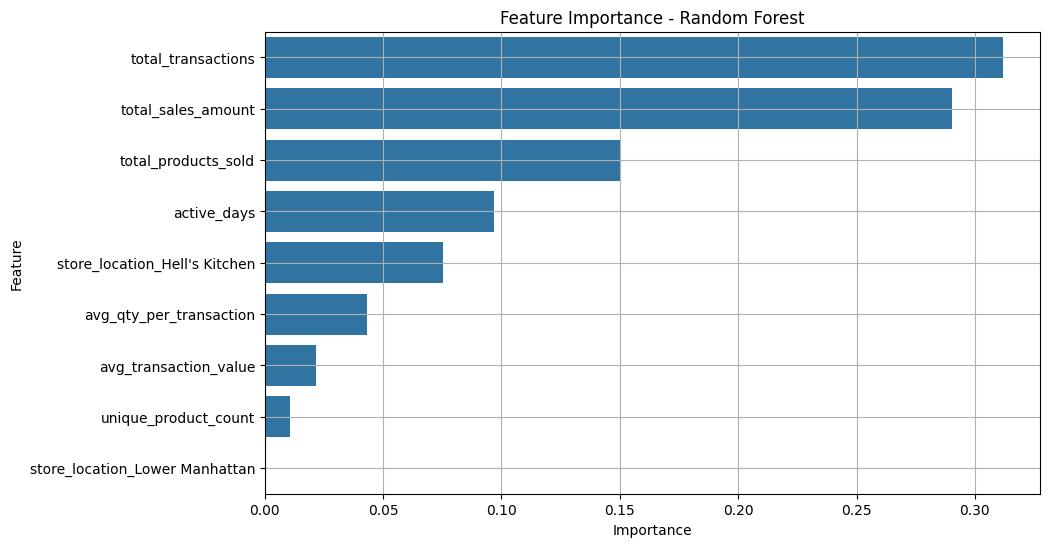

In [41]:
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.grid(True)
plt.show()

# Create DL Models

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

## One-hot encode target variable untuk Deep Learning

In [28]:
y_train_dl = to_categorical(y_train_resampled)
y_test_dl = to_categorical(y_test)

## Definisi arsitektur model

In [29]:
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.4), # Dropout layer untuk mengurangi overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_dl.shape[1], activation='softmax') # Output layer dengan softmax untuk multi-class
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile model

In [30]:
dl_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dl_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,731 (38.01 KB)

 Trainable params: 9,731 (38.01 KB)

 Non-trainable params: 0 (0.00 B)

## Callbacks untuk mencegah overfitting dan mengoptimalkan learning rate

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)

## Latih model

In [32]:
history = dl_model.fit(
    X_train_resampled, y_train_dl,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_scaled, y_test_dl),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.2894 - loss: 1.2385 - val_accuracy: 0.3333 - val_loss: 1.1740 - learning_rate: 0.0010
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3843 - loss: 1.0951 - val_accuracy: 0.3333 - val_loss: 1.1644 - learning_rate: 0.0010
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2894 - loss: 1.1237 - val_accuracy: 0.3333 - val_loss: 1.1579 - learning_rate: 0.0010
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4421 - loss: 0.9796 - val_accuracy: 0.3333 - val_loss: 1.1556 - learning_rate: 0.0010
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5000 - loss: 0.9209 - val_accuracy: 0.3333 - val_loss: 1.1539 - learning_rate: 0.0010
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6157 - loss: 0.8742 - val_accuracy: 0.3333 - val_loss: 1.1524 - learning_rate: 0.0010
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7315 - loss: 0.8173 - val_accuracy

# DL Model Evaluation

## Evaluasi pada test set

In [33]:
loss, accuracy = dl_model.evaluate(X_test_scaled, y_test_dl, verbose=0)
print(f"\nAkurasi Model DL pada Test Set: {accuracy:.4f}")


Akurasi Model DL pada Test Set: 0.3333


## Laporan Klasifikasi dan Confusion Matrix

In [34]:
y_pred_probs = dl_model.predict(X_test_scaled)
y_pred_dl = np.argmax(y_pred_probs, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


In [35]:
print("\nLaporan Klasifikasi DL:")
print(classification_report(y_test, y_pred_dl, target_names=le.classes_))


Laporan Klasifikasi DL:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       0.00      0.00      0.00         1
      Medium       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.33      0.33      0.33         3



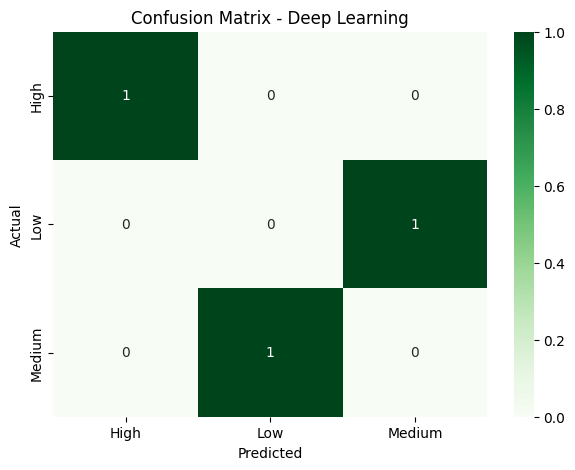

In [36]:
cm_dl = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Deep Learning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Plot Training History


--- Visualisasi Performa Training Model DL ---


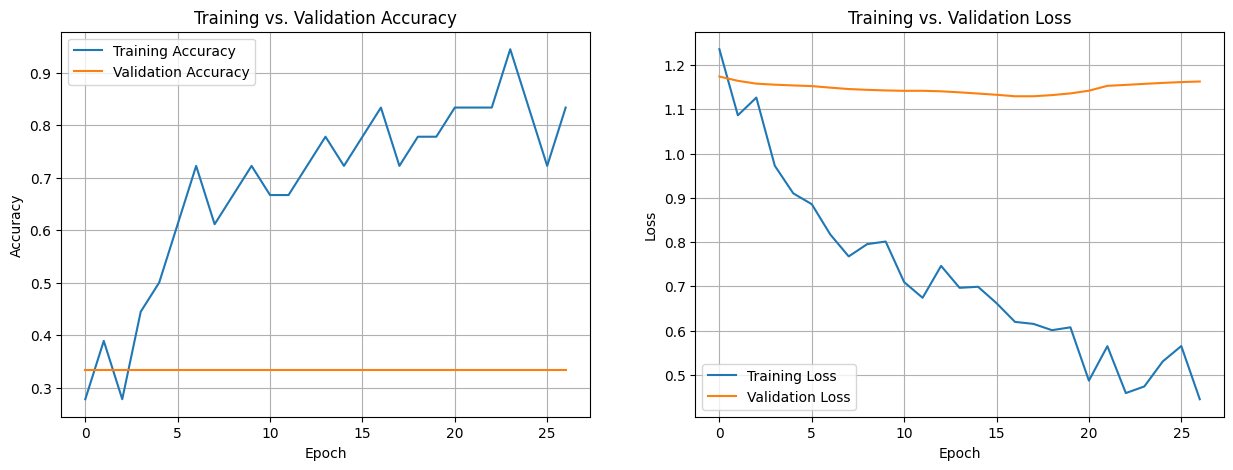

In [37]:
print("\n--- Visualisasi Performa Training Model DL ---")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot akurasi
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Training vs. Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Training vs. Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.show()

## Export the Best Model (Random Forest)

In [52]:
import joblib

# Define the filename for the exported model
model_filename = 'best_model_random_forest.joblib'

# Export the trained Random Forest model
joblib.dump(models['Random Forest'], model_filename)

print(f"Model Random Forest terbaik telah diekspor ke '{model_filename}'")

Model Random Forest terbaik telah diekspor ke 'best_model_random_forest.joblib'
